In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Read data

In [3]:
N = 1_000_000  # Samples per file

In [37]:
FDIR = '../3_build_20/'  # build_bias build_unbias build_full build2
COLS = 7  # 8


# Load multiple executiuon files

# a = np.empty((COLS, N*10*10), dtype='float64')
# for i in range(10):
#     for j in range(10):
#         a[:, N*(i*10+j): N*(i*10+j+1)] = np.loadtxt(FDIR+'addition_16_' +
#                                                     str(i)+'_'+str(j)+'.txt', delimiter=',', max_rows=N).T

m = np.empty((COLS, N*10*10), dtype='float64')
for i in range(10):
    for j in range(10):
        m[:, N*(i*10+j): N*(i*10+j+1)] = np.loadtxt(FDIR+'multiply_16_' +
                                                    str(i)+'_'+str(j)+'.txt', delimiter=',', max_rows=N).T

# c = np.empty((COLS, N*10*10), dtype='float64')
# for i in range(10):
#     for j in range(10):
#         c[:, N*(i*10+j): N*(i*10+j+1)] = np.loadtxt(FDIR+'convert_16_' +
#                                                     str(i)+'_'+str(j)+'.txt', delimiter=',', max_rows=N).T

In [27]:
def snr(signal, sample):
    return 10 * np.log10(np.mean(signal**2)
                         / np.mean((signal-sample)**2))


### Addition

In [4]:
for k, i in enumerate([a[3], a[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  &        nan &        nan &        nan &        nan \\
HUB    &        nan &        nan &        nan &        nan \\


In [28]:
# Remove 0's and cancellative subtractions
aa = a[:, (a[0] != 0) & (a[1] != 0) & (a[2] != 0)]
# aa = a[:, (a[1] != 0) & (a[2] != 0)]
# Remove just cancellative subtractions
# aa = a[:, ~(((a[1] == 0) & (a[2] != 0)) | ((a[1] != 0) & (a[2] == 0))) & ~((a[0] == 0) & (a[1] == 0) & (a[2] == 0))]
# aa = a

print(aa[:, np.argmax(aa[3])])
print(aa[:, np.argmin(aa[3])])
print(aa[:, np.argmax(aa[4])])
print(aa[:, np.argmin(aa[4])])

print(aa.shape[1]/a.shape[1])

for k, i in enumerate([aa[3], aa[4]]):
    print(
        f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} & {snr(aa[0],aa[k+1]):>10.3e} \\\\")

# names = ['Posit', 'HUB', 'HUB_unbias']
# for k, i in enumerate([aa[3], aa[4], aa[5]]):
#     print(f"{(names[k]):<11} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

[-3.12328e-05 -6.10352e-05 -3.04878e-05  9.54198e-01 -2.38550e-02
 -1.00785e-01  1.00754e-01]
[ 1.22547e-04  2.44141e-04  1.22309e-04 -9.92218e-01  1.94553e-03
 -2.78137e-01  2.78259e-01]
[-1.99890e-03 -1.95312e-03 -3.90434e-03 -2.29008e-02  9.53244e-01
  4.36520e+00 -4.36720e+00]
[ 1.55568e-05  1.52588e-05  3.05772e-05  1.91571e-02 -9.65517e-01
 -2.81217e-02  2.81373e-02]
0.99997649
Posit  & -9.922e-01 &  4.921e-07 &  9.542e-01 &  2.475e-03 &  5.602e+01 \\
HUB    & -9.655e-01 & -1.697e-05 &  9.532e-01 &  2.465e-03 &  5.600e+01 \\


In [7]:
for k, i in enumerate([aa[3], aa[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  & -9.033e-01 & -3.190e-07 &  9.922e-01 &  2.567e-03 \\
HUB    & -9.636e-01 & -1.738e-05 &  8.926e-01 &  2.556e-03 \\


### Multiplication

- `0_000000000000001_.` = $2^{-56}$
- `0_00000000000001_0.` = $2^{-52}$
- `0_0000000000001_00_` = $2^{-48}$
- `0_0000000000001_11_` = $2^{-45}$
- `0_000000000001_00_0` = $2^{-44}$
- ...
- `0_111111111110_11_1` = $2^{43}\times 1.5$
- `0_1111111111110_00_` = $2^{44}$
- `0_1111111111110_11_` = $2^{47}$
- `0_11111111111110_1.` = $2^{50}$
- `0_111111111111110_.` = $2^{52}$
- `0_111111111111111..` = $2^{56}$


<font color="red">This text is red!</font>
<font color="blue">This text is blue!</font>
<font color="gold">This text is gold!</font>
<!-- <font color="black">This text is black!</font> -->

- `0000000001100000` = $2^{-30}$
- `0111111110100000` = $2^{+30}$


- `0000000010000000` = $2^{-28}$
- `0111111110000000` = $2^{+28}$


- `0000001000000000` = $2^{-20}$
- `0111111000000000` = $2^{+20}$


- `0000010100000000` = $2^{-15}$
- `0111101100000000` = $2^{+15}$


- `0000110000000000` = $2^{-10}$
- `0111010000000000` = $2^{+10}$

In [4]:
# Input data in [2^{-30} , 2^{30}]
for k, i in enumerate([m[3], m[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  & -2.496e+03 &  5.766e-05 &  2.112e+03 &  7.811e-01 \\
HUB    & -1.550e+02 & -7.923e-06 &  1.311e+02 &  5.168e-02 \\


In [14]:
print(m[3].max(), m[4].max(), m[3].min(), m[4].min())

print(m[:, m[3].argmax()])
print(m[:, m[4].argmax()])
print(m[:, m[3].argmin()])
print(m[:, m[4].argmin()])

print(f'{2**-56:g} , {2**56:g}')

11.5747 14.3574 -11.2937 -15.1971
[-1.10363e-18 -1.38778e-17 -8.67362e-19  1.15747e+01 -2.14079e-01
  1.06024e-09 -1.04092e-09]
[-7.50726e+16 -7.20576e+16 -1.15292e+18 -4.01608e-02  1.43574e+01
  1.07078e+08 -7.01104e+08]
[ 1.12885e-18  1.38778e-17  8.67362e-19 -1.12937e+01  2.31641e-01
  1.08093e-09  1.04433e-09]
[ 7.11809e+16  7.20576e+16  1.15292e+18 -1.23157e-02 -1.51971e+01
 -1.09666e+08 -6.49069e+08]
1.38778e-17 , 7.20576e+16


In [7]:
# [2^{-30} , 2^{30}] output restricted to [2^{-56} , 2^{56}]
mm = m[:, ((2**-56) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**56))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99999401
Posit  & -3.050e+00 & -9.115e-07 &  3.041e+00 &  9.786e-03 \\
HUB    & -1.520e+01 & -9.545e-06 &  3.013e+00 &  1.038e-02 \\


In [7]:
# [2^{-28} , 2^{+28}]
for k, i in enumerate([m[3], m[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  & -3.064e+00 &  1.305e-06 &  2.977e+00 &  7.974e-03 \\
HUB    & -3.000e+00 & -8.795e-06 &  2.938e+00 &  8.193e-03 \\


In [18]:
# [2^{-20} , 2^{+20}] - Paper results
for k, i in enumerate([m[3], m[4]]):
    print(
        f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} & {snr(m[0],m[k+1]):>10.3e} \\\\")

Posit  & -1.158e-01 &  9.290e-08 &  1.163e-01 &  1.951e-03 &  2.571e+01 \\
HUB    & -1.298e-01 & -4.074e-06 &  1.302e-01 &  1.954e-03 &  2.581e+01 \\


In [14]:
# [2^{-15} , 2^{15}]
for k, i in enumerate([m[3], m[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  & -3.233e-02 & -2.083e-07 &  3.223e-02 &  8.581e-04 \\
HUB    & -3.224e-02 & -2.649e-06 &  3.223e-02 &  8.579e-04 \\


In [4]:
# [2^{-10} , 2^{10}]
for k, i in enumerate([m[3], m[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  & -3.211e-02 &  3.689e-08 &  3.262e-02 &  8.579e-04 \\
HUB    & -3.297e-02 & -2.820e-06 &  3.357e-02 &  8.580e-04 \\


Let us remove data that are not representable in Posit16, $|x| \notin [2^{-56}, 2^{56}]$.

In [61]:
print(f'{2**-56:e}, {2**56:e}')
print(m[:, np.argmax(m[3])])
print(m[:, np.argmin(m[3])])

1.387779e-17, 7.205759e+16
[-6.56725e-21 -1.38778e-17 -8.67362e-19  2.11218e+03  1.31074e+02
 -1.09821e-10  5.97993e-11]
[ 5.55843e-21  1.38778e-17  8.67362e-19 -2.49571e+03 -1.55044e+02
  6.42899e-11  8.64588e-11]


In [5]:
mm = m[:, ((2**-56) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**56))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99997717
Posit  & -3.127e+00 & -1.708e-06 &  3.167e+00 &  1.178e-02 \\
HUB    & -1.539e+01 & -9.875e-06 &  3.038e+00 &  1.223e-02 \\


In [6]:
mm = m[:, ((2**-55) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**55))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99996802
Posit  & -3.127e+00 & -1.689e-06 &  3.167e+00 &  1.171e-02 \\
HUB    & -2.996e+00 & -9.834e-06 &  3.038e+00 &  1.096e-02 \\


In [7]:
mm = m[:, ((2**-54) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**54))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.9999563
Posit  & -3.041e+00 & -1.674e-06 &  2.998e+00 &  1.096e-02 \\
HUB    & -2.996e+00 & -9.626e-06 &  3.038e+00 &  1.084e-02 \\


In [8]:
mm = m[:, ((2**-53) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**53))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99994073
Posit  & -1.061e+00 & -1.061e-06 &  1.070e+00 &  8.859e-03 \\
HUB    & -2.996e+00 & -9.858e-06 &  3.038e+00 &  1.073e-02 \\


In [9]:
mm = m[:, ((2**-51) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**52))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99990204
Posit  & -1.061e+00 & -1.021e-06 &  1.043e+00 &  8.501e-03 \\
HUB    & -1.048e+00 & -9.342e-06 &  3.038e+00 &  8.701e-03 \\


In [12]:
mm[4].max()
mm[:, mm[4].argmax()]

array([-4.46103e+15, -4.50360e+15, -1.80144e+16,  9.54236e-03,
        3.03817e+00,  3.36200e+08, -1.32690e+07])

In [6]:
mm = m[:, ((2**-48)*1.5 <= np.abs(m[0])) & (np.abs(m[0]) <= (2**47))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99970839
Posit  & -3.877e-01 & -3.407e-07 &  3.827e-01 &  6.467e-03 \\
HUB    & -5.684e-01 & -8.448e-06 &  5.648e-01 &  6.879e-03 \\


In [25]:
mm = m[:, ((2**-40) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**39)*1.125)]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.9981841
Posit  & -1.643e-01 &  7.154e-08 &  1.551e-01 &  4.061e-03 \\
HUB    & -1.907e-01 & -6.801e-06 &  1.751e-01 &  4.081e-03 \\


In [31]:
print(mm[4].max(), mm[4].argmax(), 2**-30, 2**30)
mm[:, mm[4].argmax()]

0.17511 39391176 9.313225746154785e-10 1073741824


array([-3.48285e-12, -3.63798e-12, -4.09273e-12,  4.45418e-02,
        1.75110e-01,  6.55405e-11, -5.31404e-02])

In [22]:
mm = m[:, ((2**-30) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**30))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.98566204
Posit  & -8.385e-02 &  1.862e-07 &  8.662e-02 &  2.165e-03 \\
HUB    & -9.140e-02 & -4.751e-06 &  8.136e-02 &  2.165e-03 \\


In [44]:
print(f'{2**-56:e}, {2**56:e}')
print(mm[:, np.argmax(mm[3])])
print(mm[:, np.argmin(mm[3])])
print(mm[:, np.argmax(mm[4])])
print(mm[:, np.argmin(mm[4])])

1.387779e-17, 7.205759e+16
[-1.76766e+16 -7.20576e+16 -1.80144e+16  3.07644e+00  1.91109e-02
  2.56635e+07 -6.88783e+08]
[ 5.32998e-17  2.22045e-16  5.55112e-17 -3.16595e+00 -4.14882e-02
  6.26130e-11  8.51258e-07]
[-7.19672e+16 -7.20576e+16 -1.15292e+18  1.25548e-03  1.50201e+01
 -1.25731e+08  5.72391e+08]
[ 4.45444e+15  4.50360e+15  1.80144e+16 -1.10368e-02 -3.04415e+00
  1.15144e+07  3.86859e+08]


Let us remove points $x$ that apply HUB on the regime, i.e. $x \notin [-2^{56}, -2^{-52}] \cup [2^{-56}, 2^{52}]$.  
**REMARK:** The only *all regime cases* are `01...1` and `11...1`; i.e., $maxpos$ and $-minpos$

In [5]:
mm = m[:, ((m[0] > 0) & ((2**-56) <= (m[0])) & ((m[0]) <= (2**52)))
       | ((m[0] < 0) & ((-2**-52) >= (m[0])) & ((m[0]) >= (-2**56)))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99994867
Posit  & -3.127e+00 & -9.498e-06 &  2.996e+00 &  1.033e-02 \\
HUB    & -2.992e+00 & -4.521e-06 &  3.038e+00 &  1.056e-02 \\


In [48]:
print(f'{-2**56:e}, {-2**-52:e}, {2**-56:e}, {2**52:e}')
print(mm[:, np.argmax(mm[3])])
print(mm[:, np.argmin(mm[3])])
print(mm[:, np.argmax(mm[4])])
print(mm[:, np.argmin(mm[4])])

-7.205759e+16, -2.220446e-16, 1.387779e-17, 4.503600e+15
[-1.76766e+16 -7.20576e+16 -1.80144e+16  3.07644e+00  1.91109e-02
  2.56635e+07 -6.88783e+08]
[ 5.32998e-17  2.22045e-16  5.55112e-17 -3.16595e+00 -4.14882e-02
  6.26130e-11  8.51258e-07]
[-7.19672e+16 -7.20576e+16 -1.15292e+18  1.25548e-03  1.50201e+01
 -1.25731e+08  5.72391e+08]
[ 4.45444e+15  4.50360e+15  1.80144e+16 -1.10368e-02 -3.04415e+00
  1.15144e+07  3.86859e+08]


Let us remove points $x$ that only have regime, i.e. $|x| \notin [2^{-56}, 2^{52}]$.

In [7]:
mm = m[:, ((2**-56) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**52))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99995888
Posit  & -3.127e+00 & -1.044e-06 &  3.167e+00 &  1.107e-02 \\
HUB    & -2.992e+00 & -9.322e-06 &  3.038e+00 &  1.062e-02 \\


Let us remove points $x$ that doesn't have explicit exponent bits, i.e. $|x| \notin [2^{-54}, 2^{50}]$.

In [57]:
mm = m[:, ((2**-54) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**50))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99992125
Posit  & -2.995e+00 & -1.385e-06 &  2.998e+00 &  1.064e-02 \\
HUB    & -1.086e+00 & -8.758e-06 &  1.040e+00 &  9.066e-03 \\


In [6]:
# This is the real data range for posits with explicit exponent bits
mm = m[:, ((m[0] < 0) & ((-2**52) <= (m[0])) & ((m[0]) <= (-2**-50)))
       | ((m[0] > 0) & ((2**-52) <= (m[0])) & ((m[0]) <= (2**50)))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99988811
Posit  & -1.061e+00 & -2.531e-06 &  1.043e+00 &  8.265e-03 \\
HUB    & -1.048e+00 & -7.762e-06 &  3.038e+00 &  8.616e-03 \\


Let us remove points $x$ that apply HUB on the exponent, i.e. $|x| \notin [2^{-48}, 2^{47}]$.

In [7]:
print(f'{2**-48:e}, {2**47:e}')
print(f'{2**-45:e}, {2**44:e}')

print(m[:, np.argmax(m[3])])
print(m[:, np.argmin(m[3])])
# print(m[:,np.argmax(m[4])])   # Same output
# print(m[:,np.argmin(m[4])])   # Same output

3.552714e-15, 1.407375e+14
2.842171e-14, 1.759219e+13
[-6.56725e-21 -1.38778e-17 -8.67362e-19  2.11218e+03  1.31074e+02
 -1.09821e-10  5.97993e-11]
[ 5.55843e-21  1.38778e-17  8.67362e-19 -2.49571e+03 -1.55044e+02
  6.42899e-11  8.64588e-11]


In [8]:
mm = m[:, ((2**-45) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**44))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99942968
Posit  & -3.780e-01 & -1.369e-07 &  3.827e-01 &  5.572e-03 \\
HUB    & -5.253e-01 & -7.955e-06 &  5.123e-01 &  5.768e-03 \\


In [9]:
# Midpoint
mm = m[:, ((2**-45)*1.75 <= np.abs(m[0])) & (np.abs(m[0]) <= (2**44)*1.25)]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99938395
Posit  & -2.526e-01 &  2.579e-07 &  2.549e-01 &  5.316e-03 \\
HUB    & -5.253e-01 & -8.223e-06 &  5.123e-01 &  5.672e-03 \\


In [10]:
# Midpoint
mm = m[:, ((2**-57) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**53))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99997157
Posit  & -3.127e+00 & -8.438e-07 &  3.167e+00 &  1.116e-02 \\
HUB    & -3.077e+00 & -1.026e-05 &  3.038e+00 &  1.212e-02 \\


Let us remove points $x$ so that $|x| \notin [2^{-30}, 2^{30}]$.

In [60]:
mm = m[:, ((2**-30) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**30))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.98566204
Posit  & -8.385e-02 &  1.862e-07 &  8.662e-02 &  2.165e-03 \\
HUB    & -9.140e-02 & -4.751e-06 &  8.136e-02 &  2.165e-03 \\


Let us remove points $x$ so that $|x| \notin [2^{-40}, 2^{40}]$.

In [17]:
mm = m[:, ((2**-40) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**39))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


0.99815114
Posit  & -1.643e-01 &  6.873e-08 &  1.551e-01 &  4.043e-03 \\
HUB    & -1.907e-01 & -6.777e-06 &  1.751e-01 &  4.062e-03 \\


### Conversion

In [135]:
for k, i in enumerate([c[3], c[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Posit  & -5.882e-02 &  8.503e-08 &  5.882e-02 &  1.197e-03 \\
HUB    & -6.250e-02 & -2.529e-06 &  6.198e-02 &  1.199e-03 \\


In [4]:
names = ['Posit', 'HUB', 'HUB_unbias']
for k, i in enumerate([c[3], c[4], c[5]]):
    print(
        f"{(names[k]):<11} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Posit       & -3.891e-03 & -5.405e-08 &  3.891e-03 &  3.987e-04 \\
HUB         & -7.812e-03 & -1.751e-06 &  3.876e-03 &  3.987e-04 \\
HUB_unbias  & -7.812e-03 & -4.102e-08 &  3.876e-03 &  3.987e-04 \\


In [178]:
# del(a)
# del(m)
# # del(mm)
# del(c)


In [68]:
# y = np.loadtxt('../build/add28.txt', delimiter=',').T
# z = np.loadtxt('../build/conv32.txt', delimiter=',').T
# z = np.loadtxt('../build/add32.txt', delimiter=',').T

# z = np.loadtxt('../build/add32_.txt', delimiter=',', max_rows=10000000).T
# y = np.loadtxt('../build/mul32_.txt', delimiter=',', max_rows=10000000).T
# v = np.loadtxt('../build/conv32_.txt', delimiter=',', max_rows=10000000).T

z = np.loadtxt('../build/add16_.txt', delimiter=',', max_rows=10000000).T
y = np.loadtxt('../build/mul16_.txt', delimiter=',', max_rows=10000000).T
v = np.loadtxt('../build/conv16_.txt', delimiter=',', max_rows=10000000).T

# z[0]: Exact result
# z[1]: Posit result
# z[2]: HUB result
# z[3]: Posit error
# z[4]: HUB error


In [3]:
a = np.loadtxt('../build/add.txt', delimiter=',').T
m = np.loadtxt('../build/mul.txt', delimiter=',').T
c = np.loadtxt('../build/conv.txt', delimiter=',').T


In [324]:
print(f"{'Format':<6} & {'min':>10} & {'mean':>10} & {'max':>10} & {'std':>10} \\\\")

for k, i in enumerate(a):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

for k, i in enumerate(m):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

for k, i in enumerate(c):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")


Format &        min &       mean &        max &        std \\
Posit  & -4.191e-09 &  1.653e-12 &  4.191e-09 &  1.349e-09 \\
HUB    & -4.657e-09 & -6.168e-10 &  2.794e-09 &  1.290e-09 \\
Posit  & -5.389e-09 &  1.214e-12 &  5.340e-09 &  8.572e-10 \\
HUB    & -5.299e-09 & -1.054e-12 &  5.427e-09 &  8.591e-10 \\
Posit  & -1.863e-09 &  5.807e-13 &  1.863e-09 &  8.128e-10 \\
HUB    & -1.863e-09 & -9.018e-13 &  1.863e-09 &  8.129e-10 \\


# Plot results

In [248]:
# set font of all elements to size 15
plt.rc('font', size=14)

## Addition

In [29]:
add_p = aa[3]
add_h = aa[4]

del (a)
del (aa)

print((np.min(add_p), np.max(add_p)), "U", (np.min(add_h), np.max(add_h)), "=")
r_min = min(np.min(add_p), np.min(add_h))
r_max = max(np.max(add_p), np.max(add_h))
r_min, r_max

(-0.992218, 0.954198) U (-0.965517, 0.953244) =


(-0.992218, 0.954198)

In [130]:
for frmt in [add_p, add_h]:
    print(np.histogram(frmt, bins=60000, range=(r_min, r_max))[0].max())

5892496
5958939


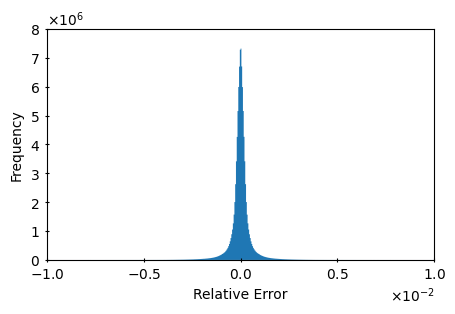

In [34]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32')
xmax = 1e-02
xmin = -xmax
# ax.hist(add_p, bins=60000, range=(r_min, r_max), color='#1f77b4')
# ax.set_ylim(0, 6e6)
ax.hist(add_p, bins=500, range=(xmin, xmax),
        histtype='stepfilled', color='#1f77b4')
ax.set_ylim(0, 8e6)

ax.set_xlim(xmin, xmax)

ax.tick_params(direction='inout')
ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_add_posit.pdf', bbox_inches='tight')
plt.show()

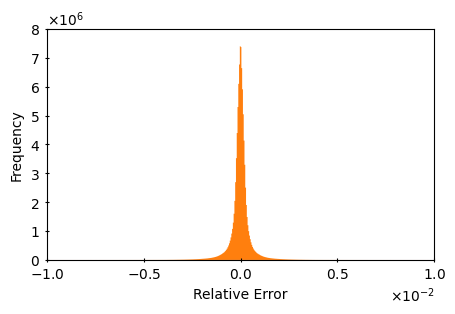

In [35]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32 HUB')
xmax = 1e-02
xmin = -xmax
# ax.hist(add_h, bins=60000, range=(r_min, r_max), color='#ff7f0e')
# ax.set_ylim(0, 6e6)
ax.hist(add_h, bins=500, range=(xmin, xmax),
        histtype='stepfilled', color='#ff7f0e')
ax.set_ylim(0, 8e6)

ax.set_xlim(xmin, xmax)

ax.tick_params(direction='inout')
ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_add_hub.pdf', bbox_inches='tight')
plt.show()

## Conversion

In [136]:
conv_p = c[3]
conv_h = c[4]

del (c)

print((np.min(conv_p), np.max(conv_p)), "U",
      (np.min(conv_h), np.max(conv_h)), "=")
r_min = min(np.min(conv_p), np.min(conv_h))
r_max = max(np.max(conv_p), np.max(conv_h))
r_min, r_max

(-0.0588235, 0.0588235) U (-0.0625, 0.0619815) =


(-0.0625, 0.0619815)

In [137]:
for frmt in [conv_p, conv_h]:
    print(np.histogram(frmt, bins=20000, range=(r_min, r_max))[0].max())

1305908
1305251


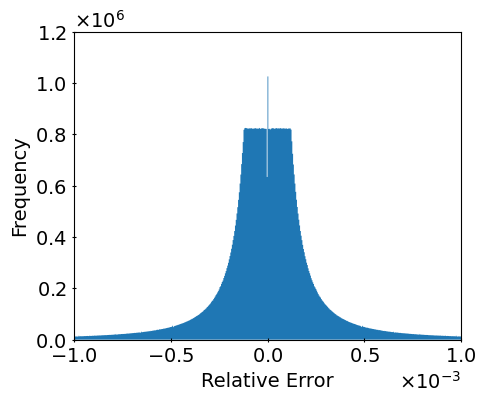

In [253]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32')
xmax = 1e-03
xmin = -xmax
# ax.hist(conv_p, bins=20000, range=(r_min, r_max), color='#1f77b4')
# ax.set_ylim(0, 6e6)
ax.hist(conv_p, bins=500, range=(xmin, xmax),
        histtype='stepfilled', color='#1f77b4')
ax.set_ylim(0, 1.2e6)

ax.set_xlim(xmin, xmax)

ax.tick_params(direction='inout')
ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_conv_posit.pdf', bbox_inches='tight')
plt.show()

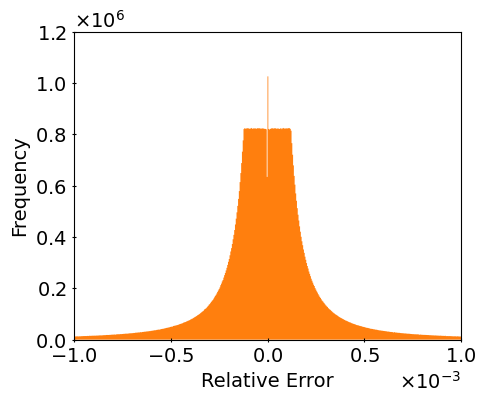

In [254]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32 HUB')
xmax = 1e-03
xmin = -xmax
# ax.hist(conv_h, bins=20000, range=(r_min, r_max), color='#ff7f0e')
# ax.set_ylim(0, 6e6)
ax.hist(conv_h, bins=500, range=(xmin, xmax),
        histtype='stepfilled', color='#ff7f0e')
ax.set_ylim(0, 1.2e6)

ax.set_xlim(xmin, xmax)

ax.tick_params(direction='inout')
ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_conv_hub.pdf', bbox_inches='tight')
plt.show()

## Multiplication

In [39]:
mul_p = m[3]
mul_h = m[4]

del (m)
# del(mm)

print((np.min(mul_p), np.max(mul_p)), "U", (np.min(mul_h), np.max(mul_h)), "=")
r_min = min(np.min(mul_p), np.min(mul_h))
r_max = max(np.max(mul_p), np.max(mul_h))
r_min, r_max

(-0.11581, 0.116259) U (-0.129777, 0.13019) =


(-0.129777, 0.13019)

In [114]:
for frmt in [mul_p, mul_h]:
    print(np.histogram(frmt, bins=250000, range=(r_min, r_max))[0].max())

7480365
7477336


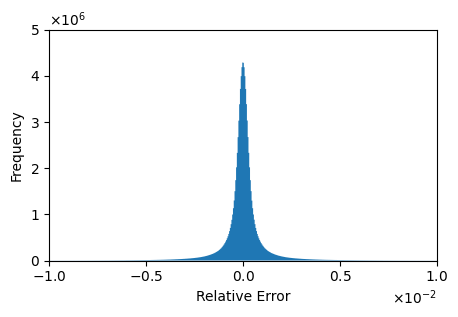

In [40]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32')
xmax = 1e-02
xmin = -xmax
# ax.hist(mul_p, bins=250000, range=(r_min, r_max), color='#1f77b4')
# ax.set_ylim(0, 6e6)
# ax.hist(mul_p, bins=500, range=(xmin, xmax), color='#1f77b4')
ax.hist(mul_p, bins=500, range=(xmin, xmax),
        histtype='stepfilled', color='#1f77b4')
ax.set_ylim(0, 5e6)

ax.set_xlim(xmin, xmax)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_mul_posit.pdf', bbox_inches='tight')
plt.show()

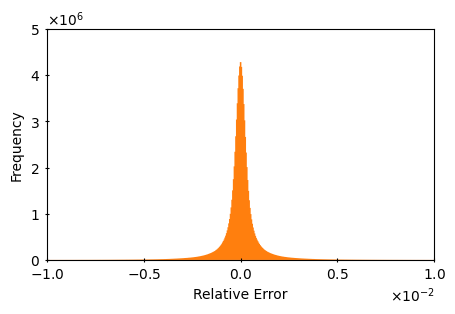

In [41]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32 HUB')
xmax = 1e-02
xmin = -xmax
# ax.hist(mul_h, bins=250000, range=(r_min, r_max), color='#ff7f0e')
# ax.set_ylim(0, 6e6)
ax.hist(mul_h, bins=500, range=(xmin, xmax),
        histtype='stepfilled', color='#ff7f0e')
ax.set_ylim(0, 5e6)

ax.set_xlim(xmin, xmax)

ax.tick_params(direction='inout')
ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_mul_hub.pdf', bbox_inches='tight')
plt.show()

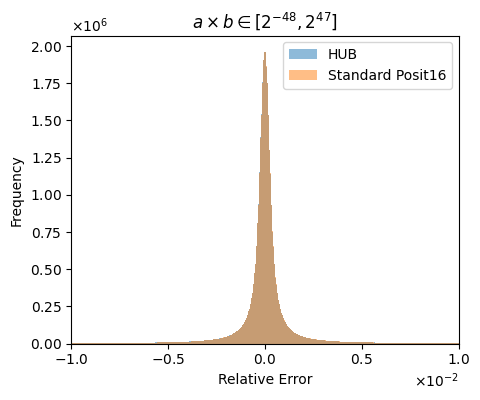

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

ax.set_title(r'$a\times b \in [2^{-48}, 2^{47}]$')
ax.hist(mul_h, bins=60000, range=(r_min, r_max),
        alpha=0.5, label='HUB')  # , color='b')
ax.hist(mul_p, bins=60000, range=(r_min, r_max), alpha=0.5,
        label='Standard Posit16')  # , color='b')

xmax = 1e-02
# xmax = 0.5
xmin = -xmax
ax.set_xlim(xmin, xmax)
# ax.set_ylim(0, 3e5)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci',
                    scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci',
                    scilimits=(0, 0), useMathText='True')

plt.legend()
plt.savefig('figs/compare_err_mul_posit_30.pdf', bbox_inches='tight')
plt.show()